# Import library

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [86]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import SGDRegressor as SGDR
from sklearn.neighbors import KNeighborsRegressor as KNNR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.tree import DecisionTreeRegressor as DTR
from xgboost import XGBRegressor as XGBR 
from catboost import CatBoostRegressor as CTR
from lightgbm import LGBMRegressor as LGBMR

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error

# Analysis

In [87]:
cobify = pd.read_csv("measurements_cleaned.csv")

In [88]:
cobify.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,E10,SP98
0,28.0,5.0,26,21.5,12,E10,0,0,0,1,0
1,12.0,4.2,30,21.5,13,E10,0,0,0,1,0
2,11.2,5.5,38,21.5,15,E10,0,0,0,1,0
3,12.9,3.9,36,21.5,14,E10,0,0,0,1,0
4,18.5,4.5,46,21.5,15,E10,0,0,0,1,0


In [89]:
# Matriz de correlación de ambos tipos de gasolina

<AxesSubplot:>

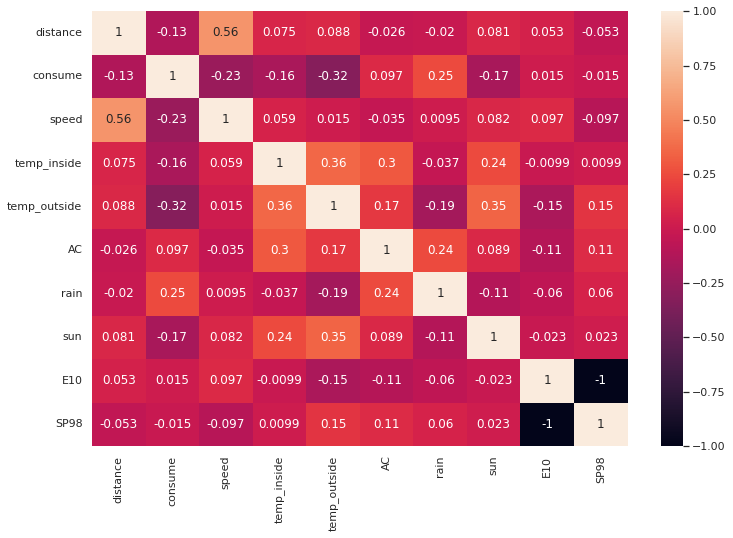

In [90]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,8.)})
sns.set_style("whitegrid")
corrMatrix = cobify.corr()
sns.heatmap(corrMatrix, annot=True)

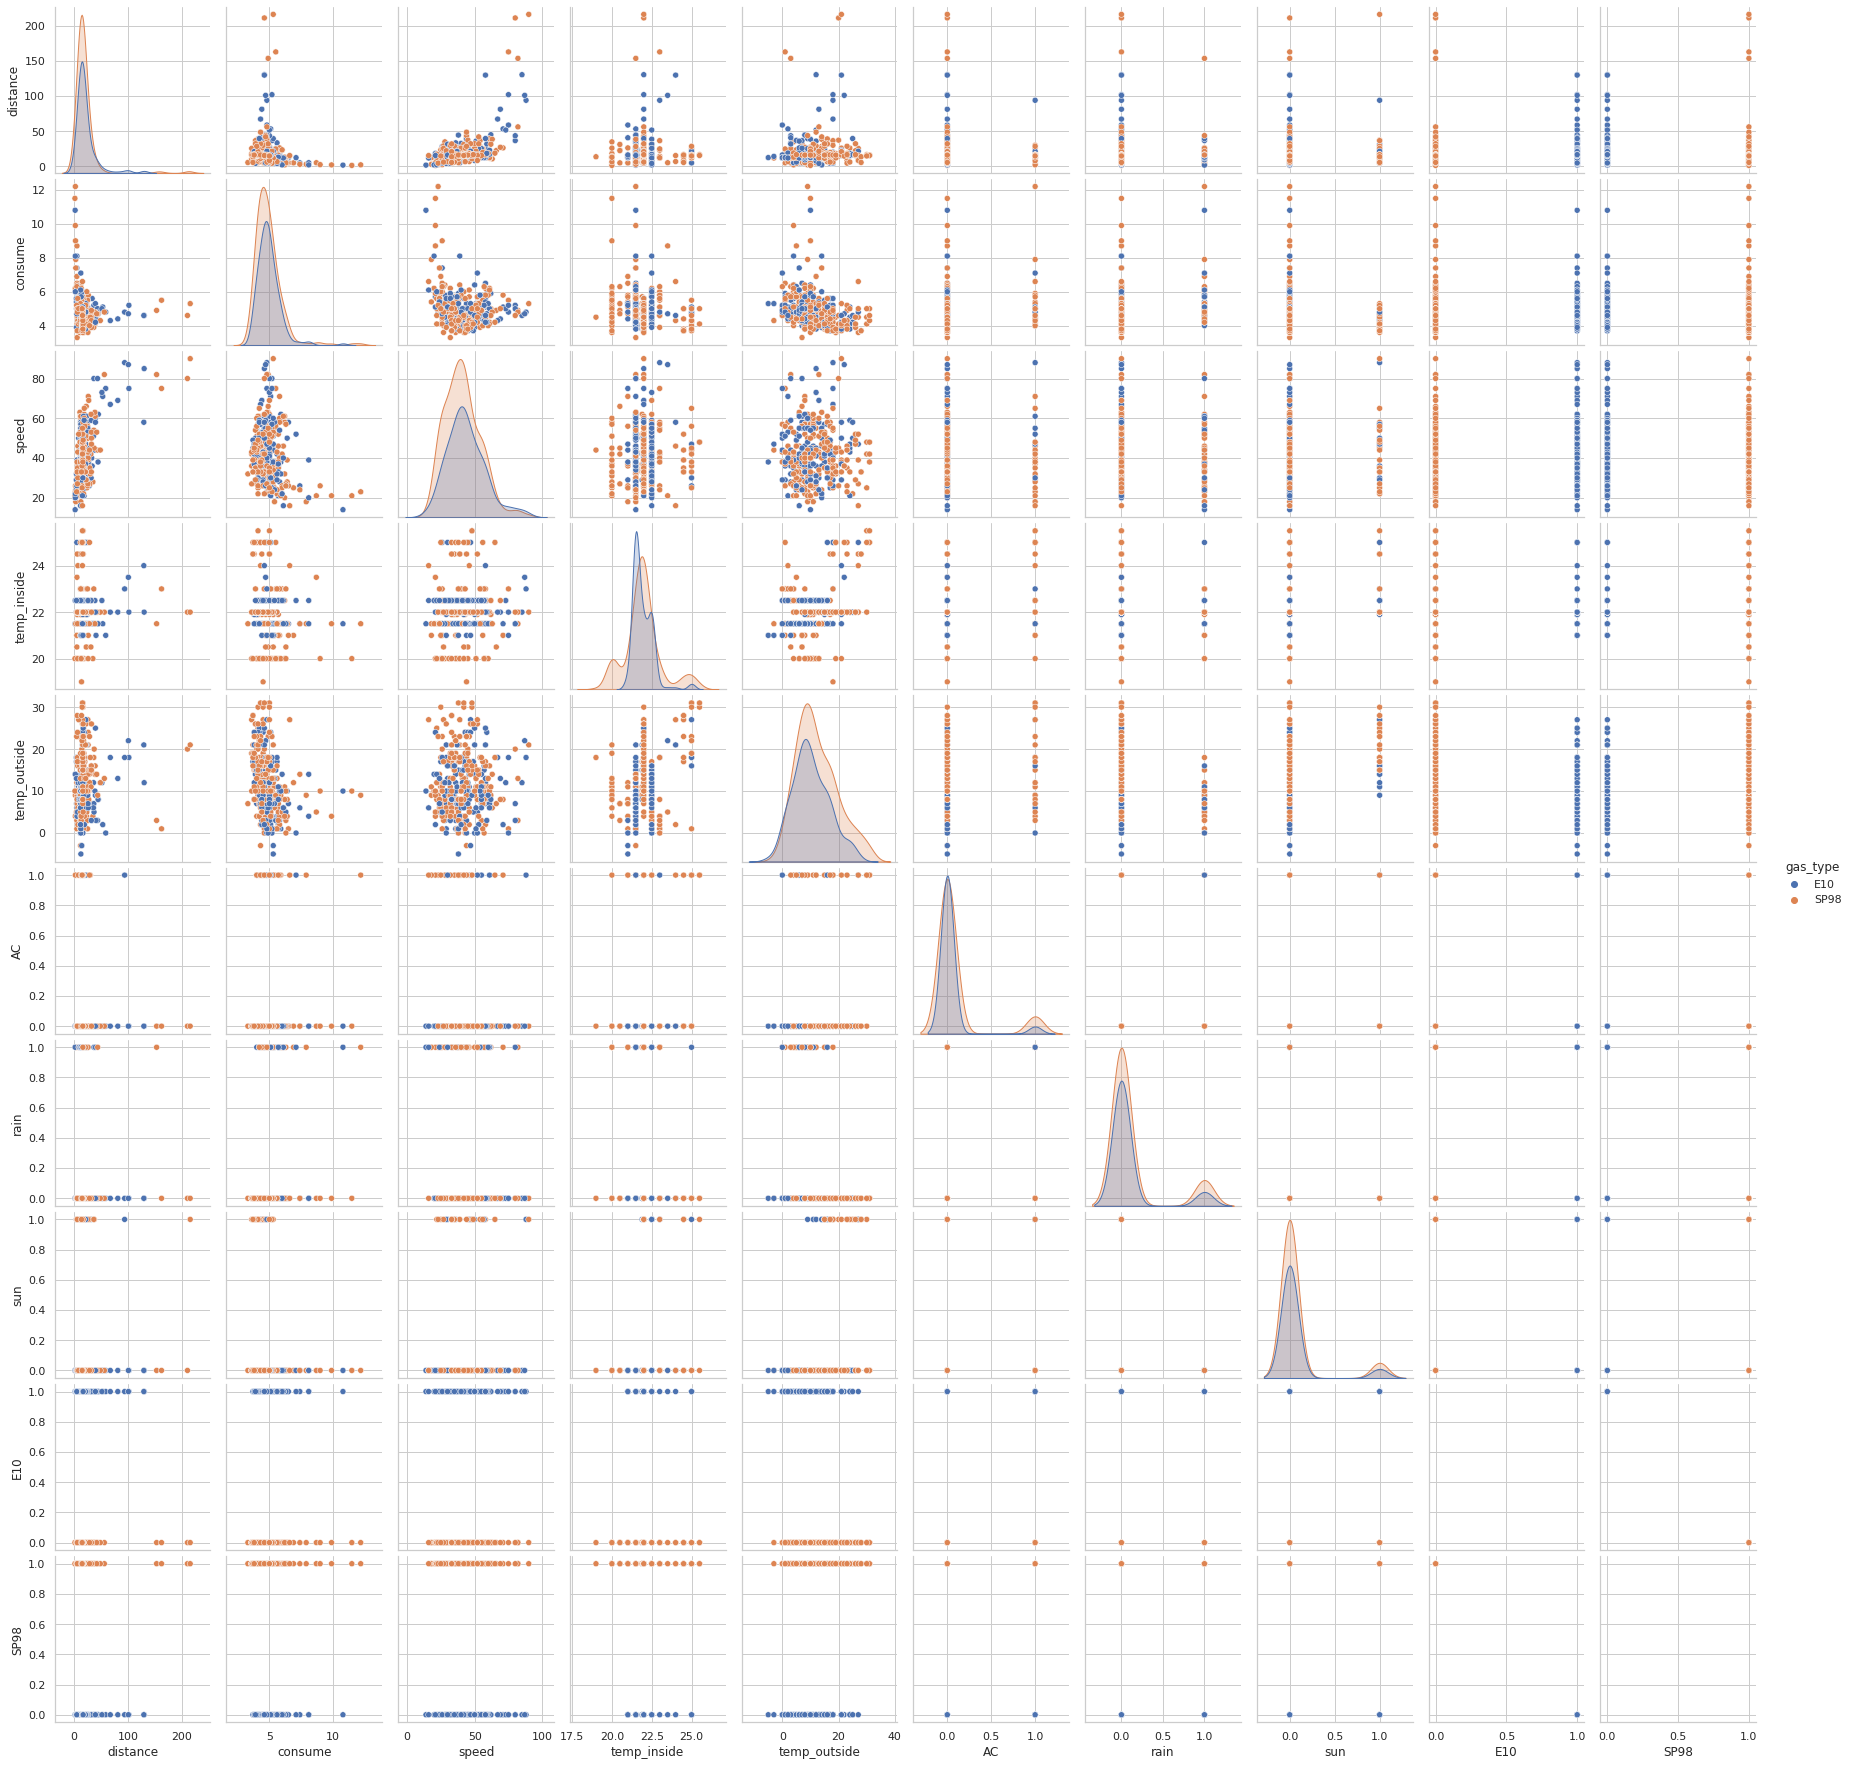

In [91]:
sns.pairplot(cobify, hue="gas_type")

Visualizo distancia y velocidad

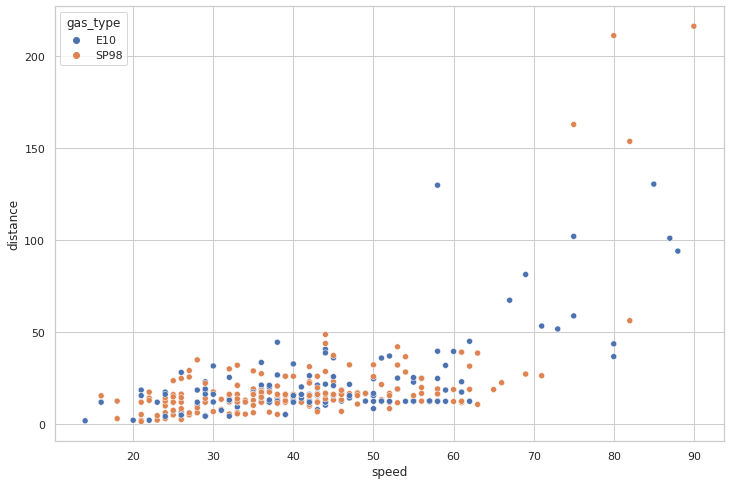

In [92]:
sns.scatterplot(x="speed", y="distance", hue="gas_type",data=cobify);

<AxesSubplot:xlabel='distance', ylabel='Count'>

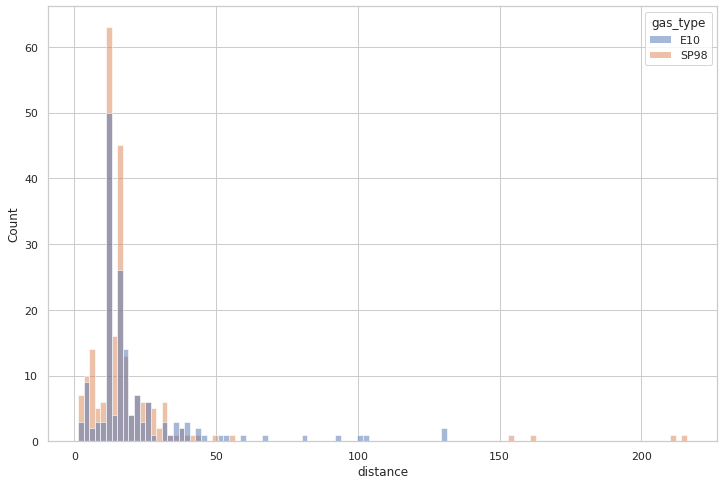

In [93]:
sns.histplot(x="distance", hue = "gas_type", data = cobify)

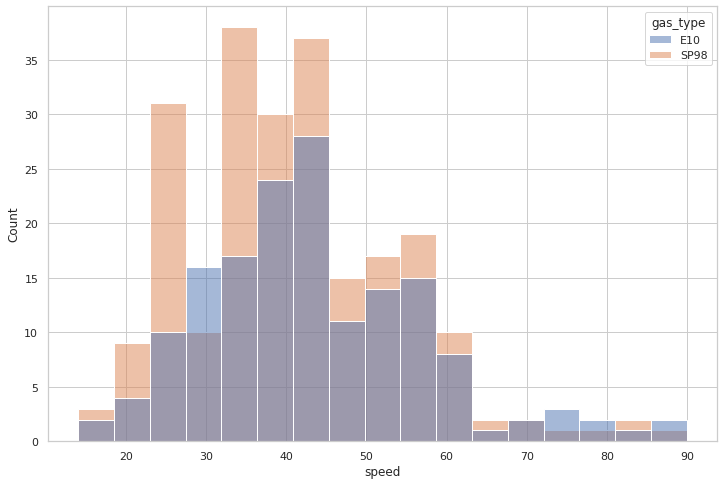

In [94]:
sns.histplot(x="speed", hue = "gas_type", data = cobify);

In [95]:
# Según el dataset el gas SP98 recorre en general distancias más largas.

Visualizo velocidad y consumo

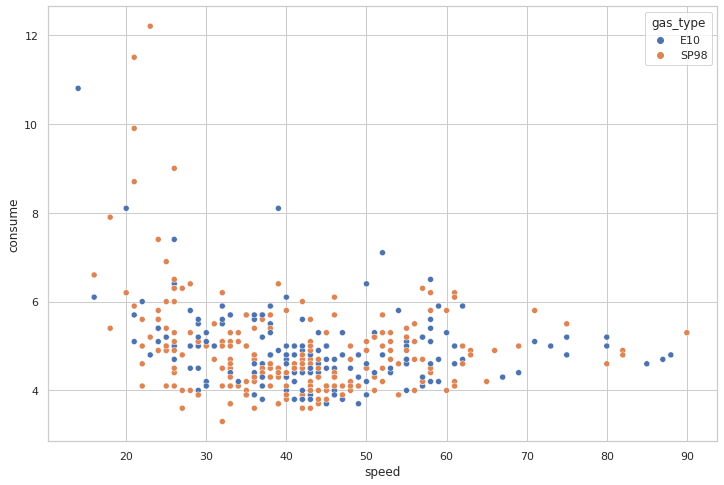

In [96]:
sns.scatterplot(x="speed", y="consume", hue="gas_type",data=cobify);

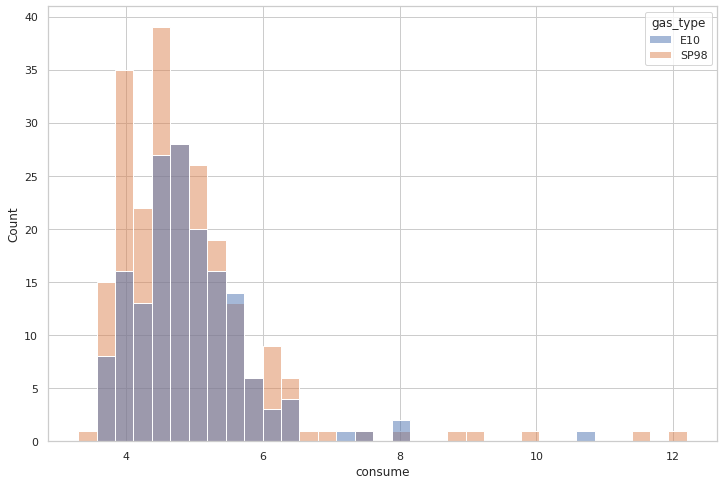

In [97]:
sns.histplot(x="consume", hue = "gas_type", data=cobify);

Visualizo medidas atípicas en consumo, distancia y velocidad.

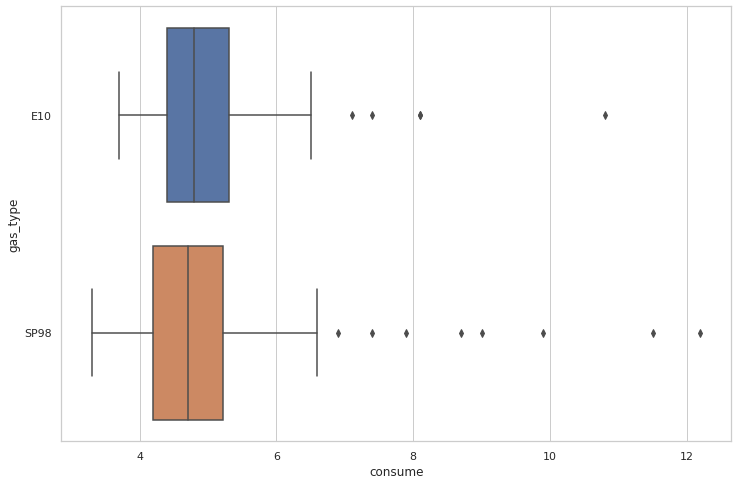

In [98]:
sns.boxplot(cobify.consume,cobify.gas_type);

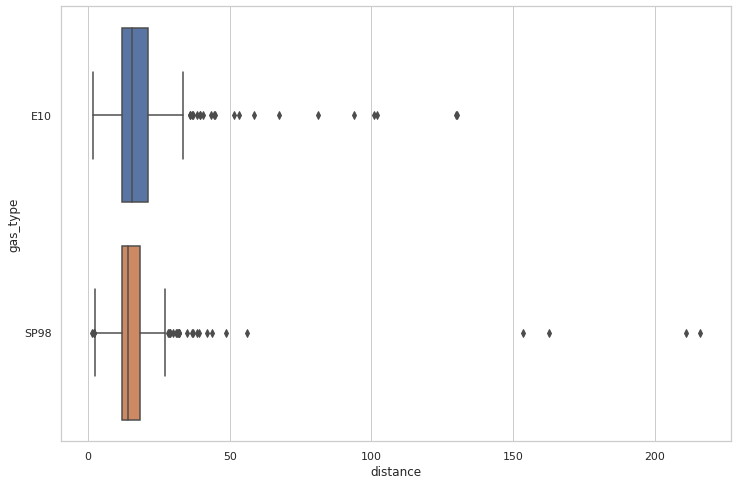

In [99]:
sns.boxplot(cobify.distance,cobify.gas_type);

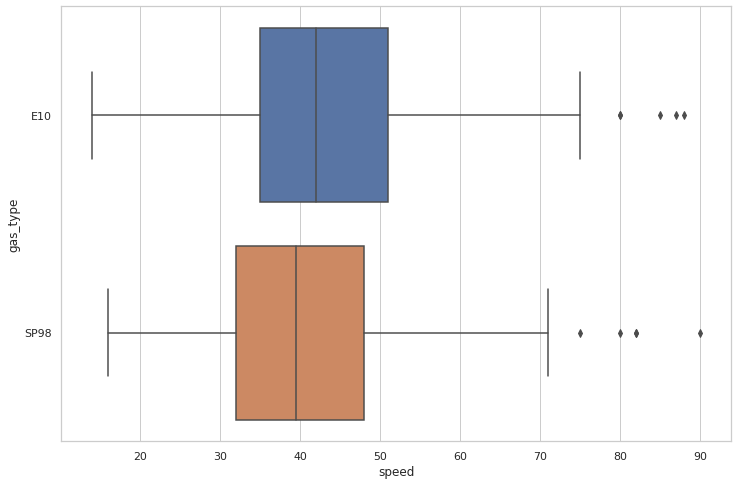

In [100]:
sns.boxplot(cobify.speed,cobify.gas_type);

In [101]:
E10 = cobify[cobify.gas_type == 'E10']
SP98 = cobify[cobify.gas_type == 'SP98']

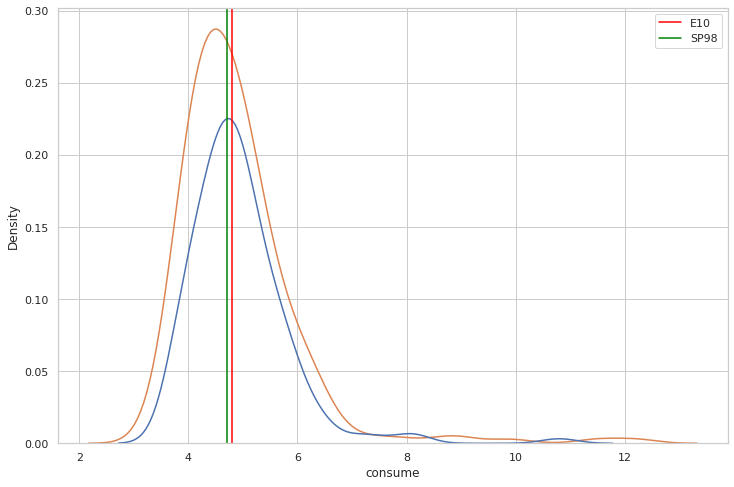

In [102]:
graf = sns.kdeplot(x=cobify.consume, hue=cobify.gas_type)
graf.axvline(x=E10.consume.median(), c="red", label = "E10")
graf.axvline(x=SP98.consume.median(), c="green", label = "SP98")
plt.legend();

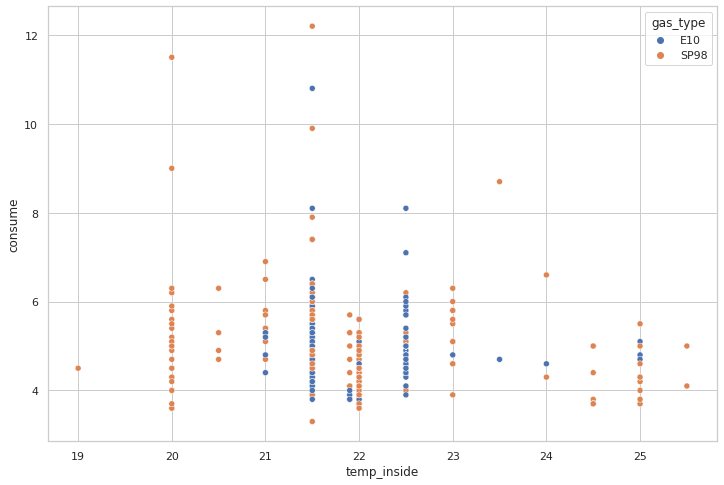

In [103]:
sns.scatterplot(x="temp_inside", y="consume", hue="gas_type",data=cobify);

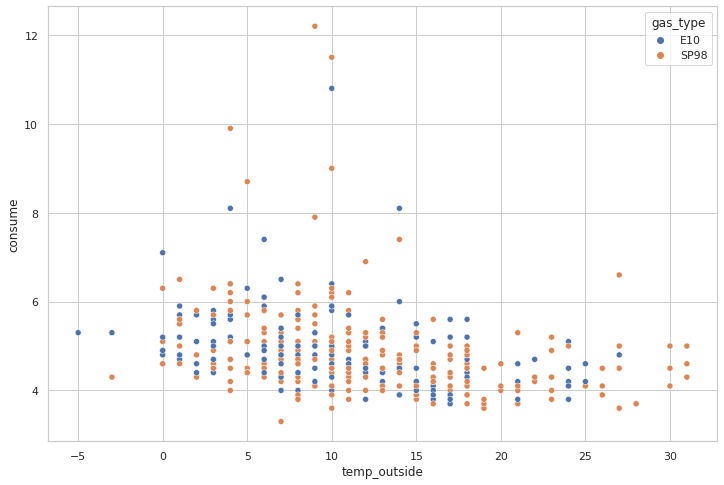

In [105]:
sns.scatterplot(x="temp_outside", y="consume", hue="gas_type",data=cobify);

In [106]:
from sklearn.model_selection import train_test_split as tts

In [107]:
from sklearn.ensemble import RandomForestRegressor as RFR

In [108]:
cobify.drop(['gas_type'], axis=1, inplace=True)

In [109]:
cobify

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,E10,SP98
0,28.0,5.0,26,21.5,12,0,0,0,1,0
1,12.0,4.2,30,21.5,13,0,0,0,1,0
2,11.2,5.5,38,21.5,15,0,0,0,1,0
3,12.9,3.9,36,21.5,14,0,0,0,1,0
4,18.5,4.5,46,21.5,15,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,0,0,0,0,1
384,16.1,4.3,38,25.0,31,1,0,0,0,1
385,16.0,3.8,45,25.0,19,0,0,0,0,1
386,15.4,4.6,42,25.0,31,1,0,0,0,1


In [110]:
X=cobify.drop(['consume'], axis=1)
y=cobify.consume

In [111]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.10, random_state=1)

In [112]:
modelo=RFR(n_estimators=700)

modelo.fit(X_train, y_train)

RandomForestRegressor(n_estimators=700)

In [113]:
modelo.feature_importances_

array([0.64649069, 0.1157747 , 0.03179571, 0.15217197, 0.01286588,
       0.0252897 , 0.00404852, 0.00584973, 0.00571311])

<BarContainer object of 9 artists>

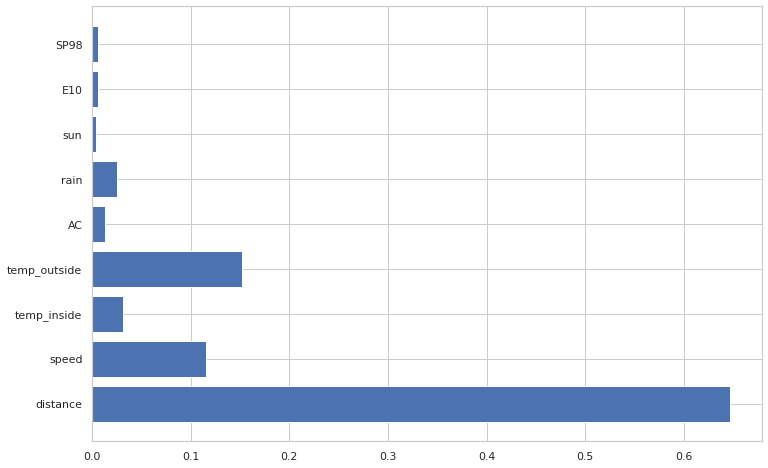

In [114]:
plt.barh(X.columns, modelo.feature_importances_)

In [115]:
modelo.score(X_test, y_test)# R2

0.02263712141052121

In [116]:
y_pred=modelo.predict(X_test)

In [117]:
train_score=modelo.score(X_train, y_train)  
test_score=modelo.score(X_test, y_test)


print('Train:', train_score)
print('Test:', test_score) 

Train: 0.9467285098744407
Test: 0.02263712141052121


In [118]:
# Aquí lo que hago es mirar diferentes modelos y ver cual tiene mejor performance.
dict_fit ={}

In [119]:
modelos=[LinReg(), Lasso(), Ridge(), ElasticNet(), SVR(), SGDR(), RFR(), KNNR(), GBR(), DTR(), XGBR(), RFR(), LGBMR(), CTR(verbose= 0)]

In [120]:
def regre(modelo):
    
    modelo.fit(X_train, y_train)
    
    train_score=modelo.score(X_train, y_train)  # R2
    test_score=modelo.score(X_test, y_test)
    
    print(modelo)
    print('Train R2:', train_score)
    print('Test R2:', test_score)
    
    return modelo

In [121]:
for i, e in enumerate(modelos):
    dict_fit[regre(e)] = (train_score, test_score)

LinearRegression()
Train R2: 0.205470782214355
Test R2: 0.19472444588798699
Lasso()
Train R2: 0.13027885561777186
Test R2: 0.15930297612121025
Ridge()
Train R2: 0.20543919464346516
Test R2: 0.19394771912524789
ElasticNet()
Train R2: 0.14733486529811157
Test R2: 0.15168979755735534
SVR()
Train R2: 0.3622817630918772
Test R2: 0.3999479702350969
SGDRegressor()
Train R2: -3.975072773549507e+23
Test R2: -4.886087780000524e+23
RandomForestRegressor()
Train R2: 0.9495595567739991
Test R2: -0.06270525259269721
KNeighborsRegressor()
Train R2: 0.7229559425830572
Test R2: 0.3706808272778086
GradientBoostingRegressor()
Train R2: 0.9091822367089725
Test R2: -0.03956365295593356
DecisionTreeRegressor()
Train R2: 0.9980770657676566
Test R2: -0.0992593627724987
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', l

TypeError: unhashable type: 'CatBoostRegressor'

## CONCLUSION

1 _ Los modelos están bastante overfiteados; el que mejor sale es al catboost. Tal y como está no se puede predecir el consumo.

2 - El carburante SP98 es más óptimo para distancias largas  mientras que en distancias cortas es mejor el E10.

3- Mayores velocidades en E10 que en SP98.

4 -Aparentemente no veo una correlación entre temperatura exterior e interior con el consumo.